In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_excel(r'smartphones.xlsx')
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [3]:
df.shape

(1020, 11)

## Data Assessing

### Quality Issues

1. **model** - some brands are written diiferently like OPPO in model column `consistency`
2. **price** - has unneccesary '₹' `validity`
3. **price** - has ',' between numbers `validity`
4. **price** - phone Namotel has a price of 99 `accuracy`
5. **ratings** - missing values `completeness`
6. **processor** - has some incorrect values for some samsung phones(row # -642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002) `validity`
7. There is ipod on row 756 `validity`
8. **memory** - incorrect values in rows (441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002) `validity`
9. **battery** - incorrect values in rows(113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002) `validity`
10. **display** - sometimes frequency is not available `completeness`
11. **display** - incorrect values in rows(378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002) `validity`
12. certain phones are foldable and the info is scattered `validity`
13. **camera** - words like Dual, Triple and Quad are used to represent number of cameras and front and rear cameras are separated by '&'
14. **camera** - problem with rows (100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016
) `validity`
15. **card** - sometimes contains info about os and camera `validity`
16. **os** - sometimes contains info about bluetooth and fm radio `validity`
17. **os** - issue with rows (324,378) `validity`
18. **os** - sometimes contains os version name like lollipop `consistency`
19. missing values in camera, card and os `completeness`
20. datatype  of price and rating is incorrect `validity`



### Tidiness Issues

1. **sim** - can be split into 3 cols has_5g, has_NFC, has_IR_Blaster
2. **ram** - can be split into 2 cols RAM and ROM
3. **processor** - can be split into processor name, cores and cpu speed.
4. **battery** - can be split into battery capacity, fast_charging_available
5. **display** - can be split into size, resolution_width, resolution_height and frequency
6. **camera** - can be split into front and rear camera
7. **card** - can be split into supported, extended_upto

In [4]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [5]:
df.columns

Index(['model', 'price', 'rating', 'sim', 'processor', 'ram', 'battery',
       'display', 'camera', 'card', 'os'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [7]:
df.isnull().sum()

model          0
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

#### converting '₹54,999' to 54999 :

In [8]:
df['price'] = df['price'].str.replace('₹','').str.replace(',','').astype(int)
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [9]:
df['price'].describe()

count      1020.000000
mean      31371.767647
std       39168.942590
min          99.000000
25%       12464.250000
50%       19815.000000
75%       34999.000000
max      650000.000000
Name: price, dtype: float64

<Axes: >

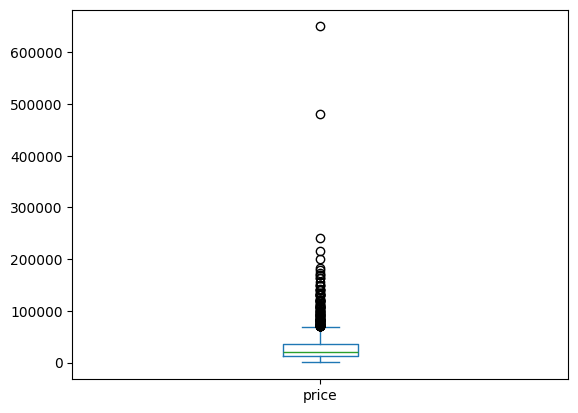

In [10]:
df['price'].plot(kind='box')

<Axes: xlabel='price', ylabel='Density'>

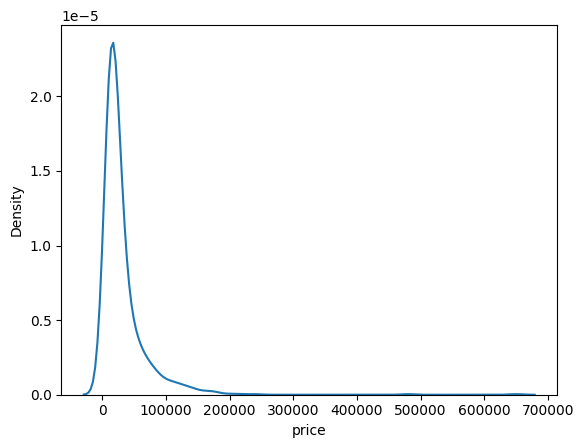

In [11]:
sns.kdeplot(data=df,x='price')

In [12]:
min_price = np.min(df['price'])
max_price = np.max(df['price'])
mean_price = np.mean(df['price'])
median_price = np.median(df['price'])

print(f"min price : {min_price}, max price : {max_price}, mean price : {mean_price}, median price : {median_price}\n")

Q1 = np.percentile(df['price'],25)
Q2 = np.percentile(df['price'],50)
Q3 = np.percentile(df['price'],75)
Q4 = np.max(df['price'])

print(f"Q1 : {Q1}, Q2 : {Q2}, Q3 : {Q3}, Q4 : {Q4}\n")

IQR = Q3 - Q1

print(f"IQR is {IQR}\n")

print(f"upper range = {Q3 + 1.5* IQR} and lower range is {Q1 - 1.5 * IQR}")

min price : 99, max price : 650000, mean price : 31371.767647058823, median price : 19815.0

Q1 : 12464.25, Q2 : 19815.0, Q3 : 34999.0, Q4 : 650000

IQR is 22534.75

upper range = 68801.125 and lower range is -21337.875


#### creating a new column named index

In [13]:
df = df.reset_index()
df.head(2)

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12


In [14]:
df['index'] = df['index'] + 2
df.tail(3)

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
1017,1019,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
1018,1020,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12
1019,1021,Samsung Galaxy M52s 5G,24990,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",Octa Core Processor,"8 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.5 inches, 1080 x 2400 px Display with Water ...",64 MP + 8 MP + 5 MP Triple Rear & 32 MP Front ...,"Memory Card Supported, upto 1 TB",Android v12


#### atleast 1 issue with rows

In [15]:
processor_rows = set((642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002))
ram_rows = set((441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002))
battery_rows = set((113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002))
display_rows = set((378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002))
camera_rows = set((100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016 ))

In [16]:
df[df['index'].isin(processor_rows| ram_rows| battery_rows| display_rows| camera_rows)].sample(4)

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
703,705,Oppo Find N 5G,92249,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 256 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 16 MP + 13 MP Triple Rear & 32 MP Fron...,Android v11
1014,1016,Vivo X Fold 2,119990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4800 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP + 50 MP + 10 MP Triple Rear & 32 MP Fron...,Android v12
582,584,Nokia 8210 4G,3749,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,No FM Radio


In [17]:
df[df['index'].isin(processor_rows| ram_rows| battery_rows| display_rows| camera_rows)].shape

(68, 12)

#### rows with all issue columns

In [18]:
df[df['index'].isin(processor_rows & ram_rows & battery_rows & display_rows & camera_rows)].sample(4)

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
930,932,iKall K88 Pro 4G,2099,NaN,"Dual Sim, 3G, 4G, VoLTE","48 MB RAM, 128 MB inbuilt",1800 mAh Battery,"2.4 inches, 240 x 360 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 128 GB",Bluetooth,Browser
647,649,Motorola Moto A10,1339,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",NaN,NaN
757,759,Karbonn KU3i,995,NaN,Dual Sim,"52 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",Bluetooth,NaN
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


In [19]:
df[df['index'].isin(processor_rows & ram_rows & battery_rows & display_rows & camera_rows)].shape

(13, 12)

#### removing feature phone price less than 3400

In [20]:
df = df[df['price'] >= 3400]
df.shape

(991, 12)

#### rows issue in processor column : 

In [21]:
df[df['index'].isin(processor_rows)]

# all are feature phones so dropping them

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
857,859,LG Folder 2,11999,NaN,"Single Sim, 3G, 4G, Wi-Fi","1 GB RAM, 8 GB inbuilt",1470 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,Bluetooth,NaN
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


In [22]:
df.drop([645,857,882,925],inplace=True)

#### issue with ram column : 

In [23]:
df[df['index'].isin(ram_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
483,485,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",512 GB inbuilt,4700 mAh Battery with 66W Fast Charging,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0
582,584,Nokia 8210 4G,3749,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"


In [24]:
df.drop(582,inplace=True)

#### battry issue rows : 

In [25]:
print(df[df['index'].isin(battery_rows)].index)
df[df['index'].isin(battery_rows)]


Index([111, 149, 307, 363, 376, 439, 448, 628, 754, 762, 853, 913, 914], dtype='int64')


,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
376,378,Nokia 2660 Flip,4649,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,0.3 MP Rear Camera
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt","6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
754,756,Apple iPod Touch (7th Gen),18900,NaN,Wi-Fi,32 GB inbuilt,"4 inches, 640 x 1136 px Display",8 MP Rear & 1.2 MP Front Camera,iOS v12,No FM Radio,Bluetooth,Browser
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,No FM Radio


In [26]:
df.drop([376,754],inplace=True)

In [27]:
temp_df = df[df['index'].isin(battery_rows)]
temp_df

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt","6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,No FM Radio
853,855,Apple iPhone 12 Pro (256GB),119900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 256 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
913,915,Apple iPhone 12 Mini (256GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio


In [28]:
x = temp_df.iloc[:,7:].shift(1,axis=1)
x

,battery,display,camera,card,os
111,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
307,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
363,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
439,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
762,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
853,None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
913,None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


In [29]:
# df.loc[df['index'].isin(battery_rows), "battery":] = df.loc[df['index'].isin(battery_rows), "battery":].shift(1, axis=1)
# df[df['index'].isin(battery_rows)]

In [30]:
# Select the rows and columns and perform the shift, then assign it back properly
df.loc[df['index'].isin(battery_rows), "battery":] = x
df[df['index'].isin(battery_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt",None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
853,855,Apple iPhone 12 Pro (256GB),119900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 256 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
913,915,Apple iPhone 12 Mini (256GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


In [31]:
df[df['index'].isin(battery_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt",None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
853,855,Apple iPhone 12 Pro (256GB),119900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 256 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
913,915,Apple iPhone 12 Mini (256GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


### camera shifting issue

In [32]:
df[df['index'].isin(camera_rows)].sample(5)

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
913,915,Apple iPhone 12 Mini (256GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
504,506,Samsung Galaxy Z Flip 4 5G,89999,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
682,684,LG V60 ThinQ,79990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2460 px Display with Punch ...",Dual Display,64 MP + 13 MP + 0.3 MP Triple Rear & 10 MP Fro...,"Memory Card (Hybrid), upto 2 TB"


In [33]:
df.drop([155, 271],inplace=True)

In [34]:
temp_df = df[df['index'].isin(camera_rows)]

In [35]:
temp_df = temp_df[~(temp_df['camera'].str.contains('MP'))][['camera','card']]
temp_df

,camera,card
98,Foldable Display,50 MP Quad Rear & 16 MP Front Camera
159,"Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...
236,"Foldable Display, Dual Display",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...
306,"Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera
321,"Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...
322,"Foldable Display, Dual Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...
365,"Foldable Display, Dual Display",50 MP + 8 MP Dual Rear & 32 MP Front Camera
392,"Foldable Display, Dual Display",50 MP + 8 MP Dual Rear & 32 MP Front Camera
482,"Foldable Display, Dual Display",50 MP Quad Rear & 16 MP + 16 MP Dual Front Camera
504,"Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera


In [36]:
x = temp_df.loc[:,"camera":"os"].shift(-1,axis=1)
x

,camera,card
98,50 MP Quad Rear & 16 MP Front Camera,None
159,50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,None
236,50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,None
306,12 MP + 12 MP Dual Rear & 10 MP Front Camera,None
321,50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,None
322,64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,None
365,50 MP + 8 MP Dual Rear & 32 MP Front Camera,None
392,50 MP + 8 MP Dual Rear & 32 MP Front Camera,None
482,50 MP Quad Rear & 16 MP + 16 MP Dual Front Camera,None
504,12 MP + 12 MP Dual Rear & 10 MP Front Camera,None


In [37]:
temp_df.index

Index([  98,  159,  236,  306,  321,  322,  365,  392,  482,  504,  569,  570,
        613,  682,  703,  709,  721,  726,  790,  844,  894,  943,  954,  993,
       1014],
      dtype='int64')

In [38]:
df[df['index'].isin(camera_rows)].index

Index([  98,  111,  149,  159,  236,  306,  307,  321,  322,  363,  365,  392,
        439,  448,  482,  504,  569,  570,  613,  628,  682,  703,  709,  721,
        726,  762,  790,  844,  853,  856,  894,  913,  914,  943,  954,  993,
       1014],
      dtype='int64')

In [39]:
df.loc[temp_df.index,"camera":"card"] = x
df[df['index'].isin(camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",50 MP Quad Rear & 16 MP Front Camera,None,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,None,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,None,Android v12
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",12 MP + 12 MP Dual Rear & 10 MP Front Camera,None,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,None,Android v12
322,324,Royole FlexPai 2,109999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 865, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4450 mAh Battery,"7.8 inches, 1440 x 1920 px Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,None,"Memory Card Supported, upto 256 GB"
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


In [40]:
df[~(df['camera'].str.contains('MP'))]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
69,71,Oppo Find N Fold,99990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Android v12


In [41]:
df['card'].isnull().sum()

25

In [42]:
df[df.index==1015]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
1015,1017,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio


#### os column has FM info and card column has os info

In [43]:
temp_df = df[(~df['card'].str.contains('Memory',na=False)) & (~df['os'].str.contains('Android',na=False))][['card','os']]
temp_df

,card,os
8,Android v12,No FM Radio
9,Android v12,No FM Radio
12,Android v12,No FM Radio
17,Android v13,No FM Radio
18,Android v12,Bluetooth
...,...,...
1009,Android v13,No FM Radio
1011,Android v12,No FM Radio
1012,Android v11,No FM Radio
1013,Android v13,No FM Radio


In [44]:
df.loc[temp_df.index,"card":] = temp_df.shift(1,axis=1)
df.loc[temp_df.index,:] 

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
8,10,Nothing Phone 1,26749,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,None,Android v12
9,11,OnePlus Nord 2T 5G,28999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,None,Android v12
12,14,Xiaomi Redmi Note 12 Pro 5G,24762,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,None,Android v12
17,19,OPPO Reno 9 Pro Plus,45999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","16 GB RAM, 256 GB inbuilt",4700 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,None,Android v13
18,20,OnePlus 10R 5G,32999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 8100 Max, Octa Core, 2.85 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,None,Android v12
...,...,...,...,...,...,...,...,...,...,...,...,...
1009,1011,Xiaomi Civi 3,32990,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2400 px, 120 Hz Display wit...",64 MP + 20 MP + 2 MP Triple Rear & 32 MP + 32 ...,None,Android v13
1011,1013,Oppo Find X6,69990,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",4700 mAh Battery with 120W Fast Charging,"6.73 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 48 MP + 32 MP Triple Rear & 32 MP Fron...,None,Android v12
1012,1014,itel A23s,4787,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor","2 GB RAM, 32 GB inbuilt",3020 mAh Battery,"5 inches, 854 x 480 px Display",2 MP Rear Camera,None,Android v11
1013,1015,Google Pixel 8 Pro,70990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Google Tensor 3, Octa Core Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.73 inches, 1440 x 3120 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 12 MP Fron...,None,Android v13


In [45]:
temp_df = df[df['index']==896]
temp_df

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
894,896,Royole FlexPai 3 5G,149999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3360 mAh Battery,"7.2 inches, 1440 x 1920 px Display",64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,None,None


In [46]:
df.head()

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


### splitting and getting Brand name

In [47]:
brand_names = df['model'].apply(lambda x :x.split(' ')[0].lower())
df.insert(1,'brand',brand_names)
df.head()

,index,brand,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


#### creating 3 columns from SIM column : has_5g, has_nfc, has_irblaster

In [48]:
df[df['sim'].str.contains("5G")].sample(5)

,index,brand,model,price,rating,sim,processor,ram,battery,display,camera,card,os
462,464,xiaomi,Xiaomi Mi Mix Alpha,199990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 855+, Octa Core, 2.96 GHz Processor","12 GB RAM, 512 GB inbuilt",4050 mAh Battery with 40W Fast Charging,"7.92 inches, 2088 x 2250 px Display",108 MP + 20 MP + 12 MP Triple Rear Camera,Memory Card Not Supported,Android v10
614,616,vivo,Vivo V28,28990,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 6 Gen 1, Octa Core, 2.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2400 px, 120 Hz Display wit...",108 MP + 13 MP + 2 MP Triple Rear & 32 MP Fron...,Memory Card Supported,Android v13
320,322,iqoo,iQOO 11 (16GB RAM + 256GB),64999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","16 GB RAM, 256 GB inbuilt",5000 mAh Battery with 120W Fast Charging,"6.78 inches, 1440 x 3200 px, 144 Hz Display wi...",50 MP + 13 MP + 8 MP Triple Rear & 16 MP Front...,None,Android v13
377,379,realme,Realme 11 Pro Plus,24999,78.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 930, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",4200 mAh Battery with 66W Fast Charging,"6.4 inches, 1080 x 2400 px, 90 Hz Display with...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12
10,12,realme,Realme 10 Pro,18999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.72 inches, 1080 x 2400 px, 120 Hz Display wi...",108 MP + 2 MP Dual Rear & 16 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v13


In [49]:
has_5g = df['sim'].apply(lambda x : 1 if "5G" in x else 0)
get_position = df.columns.get_loc('sim') + 1
df.insert(get_position,"has_5g",has_5g)


In [50]:
df[df['sim'].str.contains("NFC")].sample(5)

,index,brand,model,price,rating,sim,has_5g,processor,ram,battery,display,camera,card,os
35,37,samsung,Samsung Galaxy S21 FE 5G,39999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",1,"Exynos 2100, Octa Core, 2.9 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 25W Fast Charging,"6.4 inches, 1080 x 2340 px, 120 Hz Display wit...",12 MP + 12 MP + 8 MP Triple Rear & 32 MP Front...,Memory Card Not Supported,Android v11
517,519,xiaomi,Xiaomi Redmi Note 12 Discovery Edition,26990,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...",1,"Dimensity 1080, Octa Core, 2.6 GHz Processor","8 GB RAM, 256 GB inbuilt",4300 mAh Battery with 210W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v12
974,976,realme,Realme GT 5G,30994,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",1,"Snapdragon 888 , Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 65W Fast Charging,"6.43 inches, 1080 x 2400 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,None,Android v11
680,682,lg,LG Velvet 5G,54999,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",1,"Snapdragon 765G, Octa Core, 2.4 GHz Processor","6 GB RAM, 128 GB inbuilt",4300 mAh Battery with 25W Fast Charging,"6.8 inches, 1080 x 2460 px Display with Water ...",48 MP + 8 MP + 5 MP Triple Rear & 16 MP Front ...,Memory Card (Hybrid),Android v10
1008,1010,motorola,Motorola ThinkPhone,49990,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC",1,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68W Fast Charging,"6.6 inches, 1080 x 2400 px, 144 Hz Display",50 MP + 13 MP + 2 MP Triple Rear & 32 MP + 16 ...,None,Android v13


In [51]:
has_nfc = df['sim'].apply(lambda x : 1 if "NFC" in x else 0)
get_position = df.columns.get_loc('has_5g') + 1
df.insert(get_position,"has_nfc",has_nfc)


In [52]:
df[df['sim'].str.lower().str.contains("blaster")].sample(5)

,index,brand,model,price,rating,sim,has_5g,has_nfc,processor,ram,battery,display,camera,card,os
810,812,xiaomi,Xiaomi Redmi K60i,28999,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, IR B...",1,0,"Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 128 GB inbuilt",5080 mAh Battery with 120W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",50 MP + 13 MP + 2 MP Triple Rear & 32 MP Front...,None,Android v13
135,137,xiaomi,Xiaomi Redmi Note 11 Pro Plus 5G (8GB RAM + 25...,22999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster",1,0,"Snapdragon 695, Octa Core, 2.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,"Memory Card (Hybrid), upto 1 TB",Android v11
46,48,xiaomi,Xiaomi Redmi Note 11,11936,76.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster",0,0,"Snapdragon 680, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP Quad Rear & 13 MP Front Camera,"Memory Card Supported, upto 512 GB",Android v11
598,600,xiaomi,Xiaomi Redmi Note 8 2021,9990,75.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster",0,0,"Helio G85, Octa Core, 2 GHz Processor","4 GB RAM, 64 GB inbuilt",4000 mAh Battery with 18W Fast Charging,"6.3 inches, 1080 x 2340 px Display with Water ...",48 MP Quad Rear & 13 MP Front Camera,Memory Card Supported,Android v11
675,677,xiaomi,Xiaomi Redmi Note 10 Pro 5G,16999,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...",1,1,"Dimensity 1100 5G, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2400 px, 120 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Supported,Android v11


In [53]:
has_irblaster = df['sim'].apply(lambda x : 1 if "blaster" in x.lower() else 0)
get_position = df.columns.get_loc('has_nfc') + 1
df.insert(get_position,"has_irblaster",has_irblaster)

In [54]:
df.sample(5)

,index,brand,model,price,rating,sim,has_5g,has_nfc,has_irblaster,processor,ram,battery,display,camera,card,os
595,597,realme,Realme Narzo 50i (4GB RAM + 64GB),8999,62.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",0,0,0,"Unisoc SC9863A, Octa Core, 1.6 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery,"6.5 inches, 720 x 1600 px Display with Water D...",8 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 256 GB",Android v11
268,270,redmi,Redmi Note 11 Pro 2023,18999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster",0,0,1,"Snapdragon 712, Octa Core, 2.3 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",108 MP Quad Rear & 16 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v11
539,541,xiaomi,Xiaomi Redmi 10C (4GB RAM + 128GB),14990,73.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",0,0,0,"Snapdragon 680, Octa Core, 2.4 GHz Processor","4 GB RAM, 128 GB inbuilt",6000 mAh Battery with 18W Fast Charging,"6.7 inches, 720 x 1600 px Display with Water D...",50 MP + 2 MP Dual Rear & 5 MP Front Camera,"Memory Card Supported, upto 512 GB",Android v11
122,124,google,Google Pixel 6A,29999,71.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",1,1,0,"Google Tensor, Octa Core Processor","6 GB RAM, 128 GB inbuilt",4410 mAh Battery with Fast Charging,"6.14 inches, 1080 x 2400 px Display with Punch...",12.2 MP + 12 MP Dual Rear & 8 MP Front Camera,Memory Card Not Supported,Android v12
654,656,oppo,OPPO A55 5G,17990,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",1,0,0,"Dimensity 700, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery,"6.5 inches, 720 x 1600 px Display with Water D...",13 MP + 2 MP + 2 MP Triple Rear & 8 MP Front C...,Memory Card Supported,Android v11


#### Splitting processor column into processor_brand, processor_name, core_name , processor_speed

> str.get() handles out of index or missing value errors

In [55]:
processor_brand = df['processor'].apply(lambda x : x.split(' ')[0].strip())
get_position = df.columns.get_loc('processor') + 1
df.insert(get_position,"processor_brand",processor_brand)
df.sample(5)

,index,brand,model,price,rating,sim,has_5g,has_nfc,has_irblaster,processor,processor_brand,ram,battery,display,camera,card,os
289,291,infinix,Infinix Hot 20 (6GB RAM+ 128GB),19999,78.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",1,0,0,"Dimensity 810, Octa Core, 2.4 GHz Processor",Dimensity,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v12
868,870,google,Google Pixel 3a XL,15999,67.0,"Single Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",0,1,0,"Qualcomm Snapdragon 670, Octa Core, 2 GHz Proc...",Qualcomm,"4 GB RAM, 64 GB inbuilt",3700 mAh Battery with 18W Fast Charging,"6 inches, 1080 x 2160 px Display",12.2 MP Rear & 8 MP Front Camera,None,Android v9.0 (Pie)
603,605,realme,Realme 7 Pro (8GB RAM + 128GB),21999,85.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",0,0,0,"Snapdragon 720G , Octa Core, 2.3 GHz Processor",Snapdragon,"8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 65W Fast Charging,"6.4 inches, 1080 x 2400 px Display with Punch ...",64 MP Quad Rear & 32 MP Front Camera,"Memory Card Supported, upto 256 GB",Android v10
467,469,infinix,Infinix Hot 12 Play,8910,66.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",0,0,0,"Tiger T610, Octa Core, 1.82 GHz Processor",Tiger,"4 GB RAM, 64 GB inbuilt",6000 mAh Battery with 18W Fast Charging,"6.82 inches, 1640 x 720 px, 90 Hz Display with...",13 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 256 GB",Android v11
389,391,realme,Realme 9i (6GB RAM + 128GB),14999,78.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",0,0,0,"Snapdragon 680, Octa Core, 2.4 GHz Processor",Snapdragon,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.6 inches, 1080 x 2412 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card Supported, upto 1 TB",Android v11


In [56]:
processor_name = df['processor'].apply(lambda x : x.split(',')[0].strip())
get_position = df.columns.get_loc('processor') + 2
df.insert(get_position,"processor_name",processor_name)
df.sample(5)

,index,brand,model,price,rating,sim,has_5g,has_nfc,has_irblaster,processor,processor_brand,processor_name,ram,battery,display,camera,card,os
456,458,asus,Asus ZenFone 9,63990,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",1,1,0,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon,Snapdragon 8+ Gen1,"8 GB RAM, 128 GB inbuilt",4300 mAh Battery with 30W Fast Charging,"5.9 inches, 1080 x 2400 px, 120 Hz Display wit...",50 MP + 12 MP Dual Rear & 12 MP Front Camera,None,Android v12
270,272,samsung,Samsung Galaxy A32 (8GB RAM + 128GB),16499,82.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",0,0,0,"Helio G80, Octa Core, 2 GHz Processor",Helio,Helio G80,"8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.4 inches, 1080 x 2400 px, 90 Hz Display with...",64 MP Quad Rear & 20 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v11
388,390,samsung,Samsung Galaxy A04s,12990,71.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",0,0,0,"Exynos 850, Octa Core, 2 GHz Processor",Exynos,Exynos 850,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.5 inches, 720 x 1600 px, 90 Hz Display with ...",50 MP + 2 MP + 2 MP Triple Rear & 5 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12
697,699,infinix,Infinix Smart 6 Plus,8299,63.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",0,0,0,"Helio G25, Octa Core, 2 GHz Processor",Helio,Helio G25,"3 GB RAM, 64 GB inbuilt",5000 mAh Battery,"6.82 inches, 720 x 1600 px Display with Water ...",8 MP + Depth Sensor Dual Rear & 5 MP Front Camera,"Memory Card Supported, upto 512 GB",Android v12
589,591,xiaomi,Xiaomi Redmi 10C,13990,71.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",0,0,0,"Snapdragon 680, Octa Core, 2.4 GHz Processor",Snapdragon,Snapdragon 680,"4 GB RAM, 64 GB inbuilt",6000 mAh Battery with 18W Fast Charging,"6.7 inches, 720 x 1600 px Display with Water D...",50 MP + 2 MP Dual Rear & 5 MP Front Camera,"Memory Card Supported, upto 512 GB",Android v11


In [57]:
core_name = df['processor'].str.split(',').str.get(1).str.strip()
get_position = df.columns.get_loc('processor') + 3
df.insert(get_position,"core",core_name)

df['core'] = df['core'].str.replace('Octa Core Processor','Octa Core').str.replace('Hexa Core Processor','Hexa Core').str.lower()
df.sample(5)

,index,brand,model,price,rating,sim,has_5g,has_nfc,has_irblaster,processor,processor_brand,processor_name,core,ram,battery,display,camera,card,os
870,872,samsung,Samsung Galaxy S10 5G,78990,86.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",1,1,0,"Exynos 9820, Octa Core, 2.7 GHz Processor",Exynos,Exynos 9820,octa core,"8 GB RAM, 256 GB inbuilt",4500 mAh Battery with 25W Fast Charging,"6.7 inches, 1440 x 3040 px Display",16 MP + 12 MP + 12 MP Triple Rear & 10 MP Fron...,"Memory Card (Hybrid), upto 512 GB",Android v9.0 (Pie)
888,890,oneplus,OnePlus Nord 4 5G,29999,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",1,1,0,"Snapdragon 7 Gen1, Octa Core, 2.36 GHz Processor",Snapdragon,Snapdragon 7 Gen1,octa core,"8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2412 px, 120 Hz Display wi...",50 MP + 12 MP + 5 MP Triple Rear & 32 MP Front...,None,Android v12
763,765,tecno,Tecno Pova Neo 5G,15499,71.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",0,0,0,"Dimensity 810 5G, Octa Core, 2.4 GHz Processor",Dimensity,Dimensity 810 5G,octa core,"4 GB RAM, 128 GB inbuilt",6000 mAh Battery with 18W Fast Charging,"6.8 inches, 1080 x 2400 px, 120 Hz Display wit...",50 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v12
581,583,oppo,OPPO A77 (4GB RAM + 128 GB),15998,71.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",0,0,0,"Helio G35, Octa Core, 2.3 GHz Processor",Helio,Helio G35,octa core,"4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.56 inches, 720 x 1600 px Display with Water ...",50 MP Dual Rear & 8 MP Front Camera,Memory Card Supported,Android v12
423,425,xiaomi,Xiaomi 12S Ultra,69990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...",1,1,1,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon,Snapdragon 8+ Gen1,octa core,"8 GB RAM, 256 GB inbuilt",4860 mAh Battery with 67W Fast Charging,"6.73 inches, 1440 x 3200 px, 120 Hz Display wi...",50 MP + 48 MP + 48 MP Triple Rear & 32 MP Fron...,None,Android v12


In [58]:
processor_speed = df['processor'].str.split(',').str.get(2).str.strip()

get_position = df.columns.get_loc('processor') + 4
df.insert(get_position,"processor_speed",processor_speed)

df['processor_speed'] = df['processor_speed'].str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0).astype(float)
df.sample(5)

,index,brand,model,price,rating,sim,has_5g,has_nfc,has_irblaster,processor,processor_brand,processor_name,core,processor_speed,ram,battery,display,camera,card,os
867,869,motorola,Motorola One Macro,11490,68.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",0,0,0,"Helio P70, Octa Core, 2 GHz Processor",Helio,Helio P70,octa core,2.00,"4 GB RAM, 64 GB inbuilt",4000 mAh Battery with 10W Fast Charging,"6.2 inches, 720 x 1520 px Display with Water D...",13 MP + 2 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card (Hybrid), upto 512 GB",Android v9.0 (Pie)
303,305,motorola,Motorola Moto G51 5G,12999,77.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",1,1,0,"Snapdragon 480+, Octa Core, 2.2 GHz Processor",Snapdragon,Snapdragon 480+,octa core,2.20,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery,"6.8 inches, 1080 x 2400 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card (Hybrid), upto 512 GB",Android v11
185,187,realme,Realme 10 5G,14499,79.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",1,0,0,"Dimensity 700 5G, Octa Core, 2.2 GHz Processor",Dimensity,Dimensity 700 5G,octa core,2.20,"8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP Triple Rear & 8 MP Front Camera,"Memory Card Supported, upto 1 TB",Android v12
495,497,iqoo,iQOO Neo 6 5G (12GB RAM + 256GB),33749,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster",1,0,1,"Snapdragon 870, Octa Core, 3.2 GHz Processor",Snapdragon,Snapdragon 870,octa core,3.20,"12 GB RAM, 256 GB inbuilt",4700 mAh Battery with 80W Fast Charging,"6.62 inches, 1080 x 2400 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,None,Android v12
636,638,apple,Apple iPhone 14 (512GB),95999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",1,1,0,"Bionic A15, Hexa Core, 3.22 GHz Processor",Bionic,Bionic A15,hexa core,3.22,"6 GB RAM, 512 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v16


In [59]:
df.loc[856,'processor_name'] = 'Mediatek MT6739'
df.loc[856,'processor_brand'] = 'Mediatek'

In [60]:
df.loc[856,:]

index                                                858
brand                                            samsung
model                            Samsung Galaxy A01 Core
price                                               4999
rating                                               NaN
sim                       Dual Sim, 3G, 4G, VoLTE, Wi-Fi
has_5g                                                 0
has_nfc                                                0
has_irblaster                                          0
processor          (28 nm), Quad Core, 1.5 GHz Processor
processor_brand                                 Mediatek
processor_name                           Mediatek MT6739
core                                           quad core
processor_speed                                      1.5
ram                              1 GB RAM, 16 GB inbuilt
battery                                 3000 mAh Battery
display                5.3 inches, 720 x 1480 px Display
camera                     8 MP

#### working on ram column to get internal ram and external storage

In [61]:
internal_ram = df['ram'].str.split(',').str.get(0).str.replace('\u2009GB RAM','')
internal_ram = internal_ram.str.split(',').str.get(0).str.replace('\u2009GB inbuilt','')
internal_ram = internal_ram.str.split(',').str.get(0).str.replace('\u2009GB inbuilt','')
internal_ram = internal_ram.str.split(',').str.get(0).str.replace('512\u2009MB RAM','0.5')
internal_ram = internal_ram.str.split(',').str.get(0).str.replace('64\u2009MB RAM','0.06')
location = df.columns.get_loc('ram')+1
df.insert(location,"internal ram",internal_ram)
df.head(5)

,index,brand,model,price,rating,sim,has_5g,has_nfc,has_irblaster,processor,...,processor_name,core,processor_speed,ram,internal ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",1,1,0,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",...,Snapdragon 8 Gen2,octa core,3.2,"12 GB RAM, 256 GB inbuilt",12,5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",1,0,0,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,Snapdragon 695,octa core,2.2,"6 GB RAM, 128 GB inbuilt",6,5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",1,0,0,"Exynos 1330, Octa Core, 2.4 GHz Processor",...,Exynos 1330,octa core,2.4,"4 GB RAM, 64 GB inbuilt",4,5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",1,0,0,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,Snapdragon 695,octa core,2.2,"6 GB RAM, 128 GB inbuilt",6,5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",1,0,0,"Dimensity 1080, Octa Core, 2.6 GHz Processor",...,Dimensity 1080,octa core,2.6,"6 GB RAM, 128 GB inbuilt",6,5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [62]:
battery_capacity = df['battery'].str.strip().str.split('with').str.get(0).str.strip().str.findall(r'\b(\d+)\b').str.get(0).astype(float)
location = df.columns.get_loc('battery')+1
df.insert(location,"battery_capacity",battery_capacity)
df.head(5)

,index,brand,model,price,rating,sim,has_5g,has_nfc,has_irblaster,processor,...,core,processor_speed,ram,internal ram,battery,battery_capacity,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",1,1,0,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",...,octa core,3.2,"12 GB RAM, 256 GB inbuilt",12,5000 mAh Battery with 100W Fast Charging,5000.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",1,0,0,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,octa core,2.2,"6 GB RAM, 128 GB inbuilt",6,5000 mAh Battery with 33W Fast Charging,5000.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",1,0,0,"Exynos 1330, Octa Core, 2.4 GHz Processor",...,octa core,2.4,"4 GB RAM, 64 GB inbuilt",4,5000 mAh Battery with 15W Fast Charging,5000.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",1,0,0,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,octa core,2.2,"6 GB RAM, 128 GB inbuilt",6,5000 mAh Battery with Fast Charging,5000.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",1,0,0,"Dimensity 1080, Octa Core, 2.6 GHz Processor",...,octa core,2.6,"6 GB RAM, 128 GB inbuilt",6,5000 mAh Battery with 67W Fast Charging,5000.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [63]:
df['battery_capacity'].value_counts()

battery_capacity
5000.0    487
4500.0     97
6000.0     60
4000.0     42
4700.0     27
         ... 
3520.0      1
2150.0      1
5600.0      1
4470.0      1
8000.0      1
Name: count, Length: 91, dtype: int64

In [64]:
fast_charging = df['battery'].str.strip().str.split('with').str.get(1).str.strip().str.findall(r'\d{2,3}')
location = df.columns.get_loc('battery_capacity')+1
df.insert(location,"fast_charging",fast_charging)
df.head(5)

,index,brand,model,price,rating,sim,has_5g,has_nfc,has_irblaster,processor,...,processor_speed,ram,internal ram,battery,battery_capacity,fast_charging,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",1,1,0,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",...,3.2,"12 GB RAM, 256 GB inbuilt",12,5000 mAh Battery with 100W Fast Charging,5000.0,[100],"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",1,0,0,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,2.2,"6 GB RAM, 128 GB inbuilt",6,5000 mAh Battery with 33W Fast Charging,5000.0,[33],"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",1,0,0,"Exynos 1330, Octa Core, 2.4 GHz Processor",...,2.4,"4 GB RAM, 64 GB inbuilt",4,5000 mAh Battery with 15W Fast Charging,5000.0,[15],"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",1,0,0,"Snapdragon 695, Octa Core, 2.2 GHz Processor",...,2.2,"6 GB RAM, 128 GB inbuilt",6,5000 mAh Battery with Fast Charging,5000.0,[],"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",1,0,0,"Dimensity 1080, Octa Core, 2.6 GHz Processor",...,2.6,"6 GB RAM, 128 GB inbuilt",6,5000 mAh Battery with 67W Fast Charging,5000.0,[67],"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [65]:
def fast_charging_extractor(item):

  if type(item) == list:
    if len(item) == 1:
      return item[0]
    else:
      return 0
  else:
    return -1

In [66]:
df['fast_charging'] = df['fast_charging'].apply(fast_charging_extractor).astype(int)

# EDA on mobile_dataset : 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
df = pd.read_csv(r'smartphone_cleaned_v5.csv')
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [7]:
df.shape

(980, 25)

In [8]:
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000


In [9]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [10]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'resolution', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'],
      dtype='object')

#### brand_name

In [14]:
df['brand_name'].value_counts()

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: count, dtype: int64

<Axes: xlabel='brand_name'>

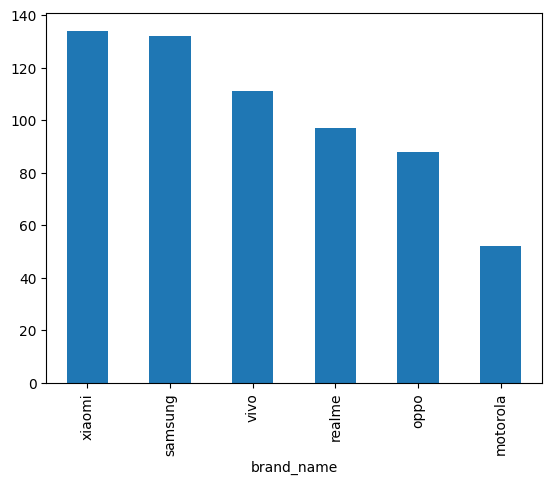

In [17]:
df['brand_name'].value_counts()[:6].plot(kind='bar')

[]

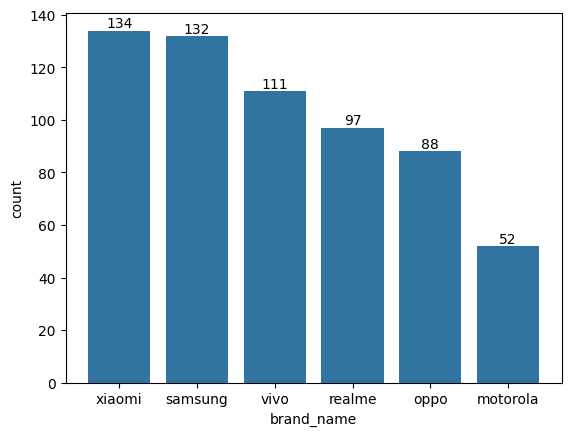

In [24]:
ax = sns.barplot(df['brand_name'].value_counts()[:6])
ax.bar_label(ax.containers[0])
plt.plot()

<Axes: ylabel='count'>

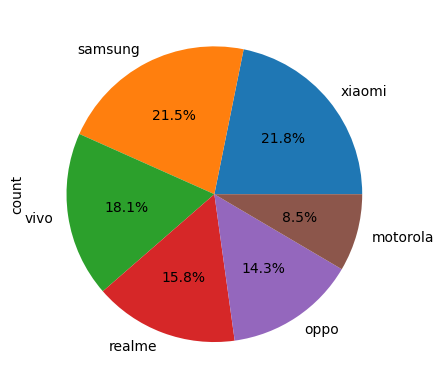

In [26]:
df['brand_name'].value_counts()[:6].plot(kind='pie',autopct ='%0.1f%%')

In [27]:
def plot_graphs(column_name):

  sns.displot(kind='hist',kde=True,data=df,x=column_name,label=column_name)
  sns.catplot(kind='box',data=df,x=column_name)

In [28]:
num_columns = df.select_dtypes(include=['float64','int64']).iloc[:,[3,4,6,9,13,14,16]].columns

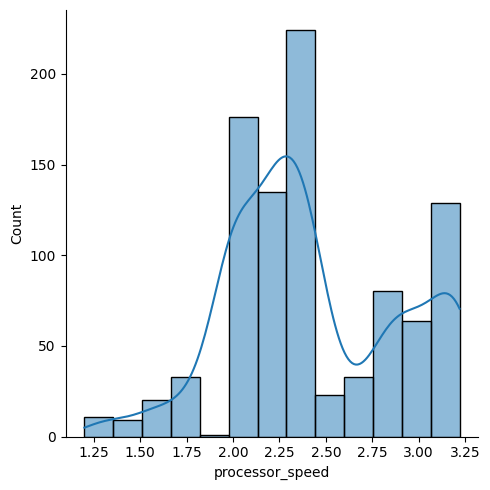

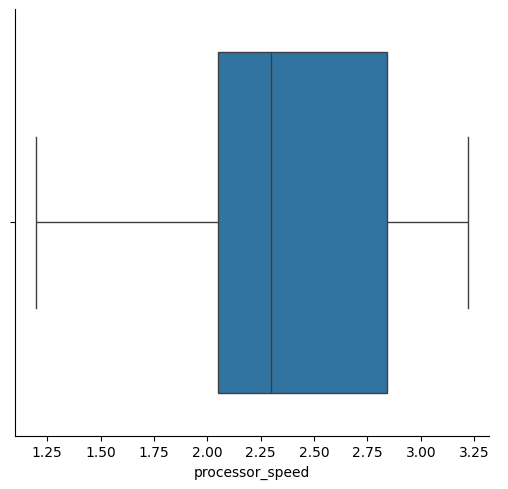

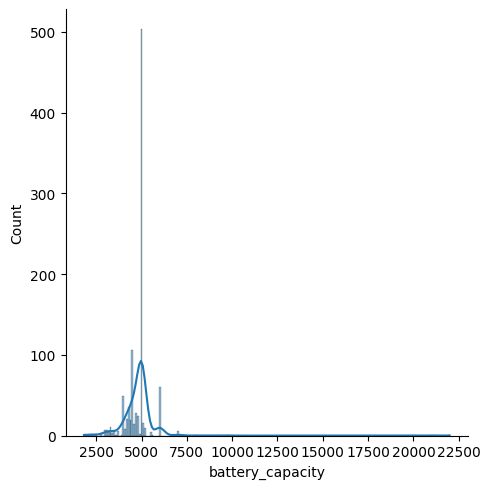

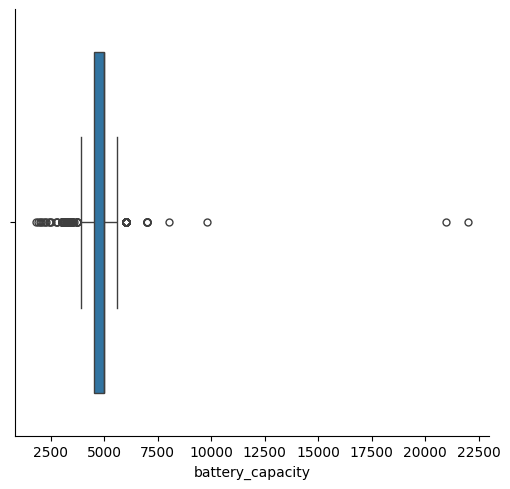

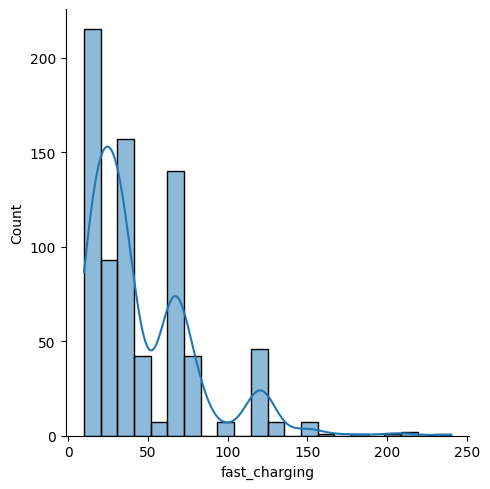

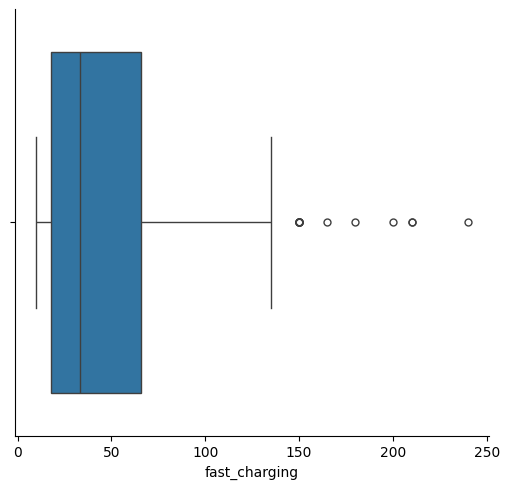

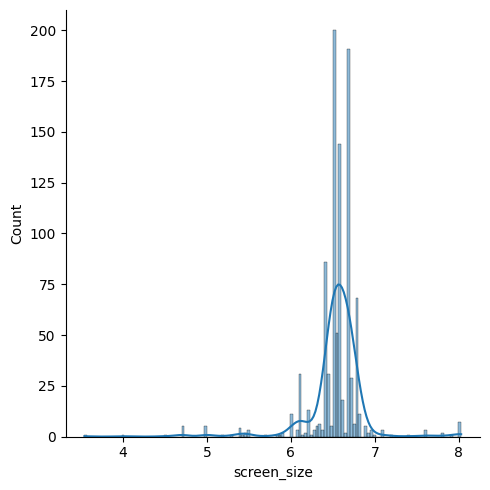

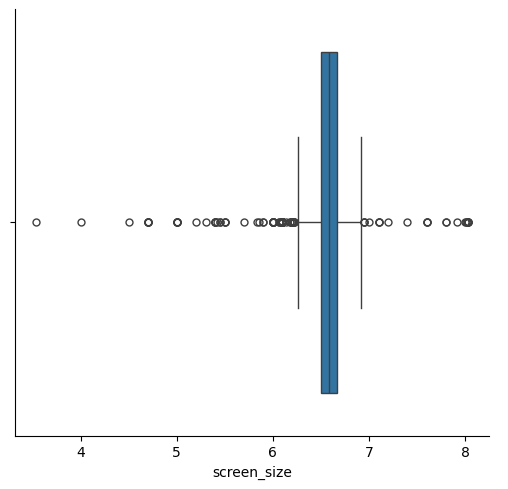

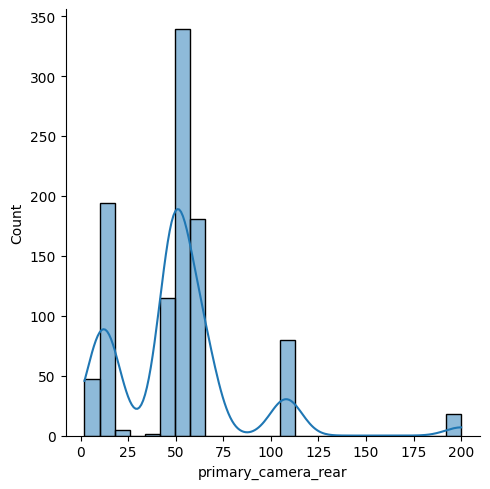

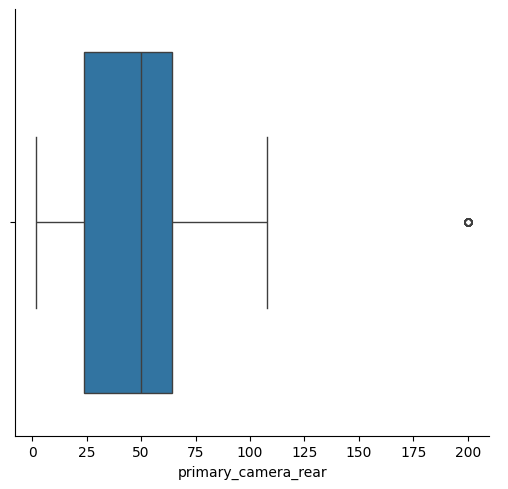

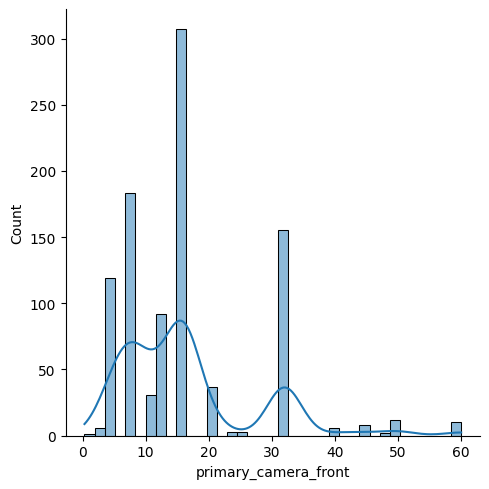

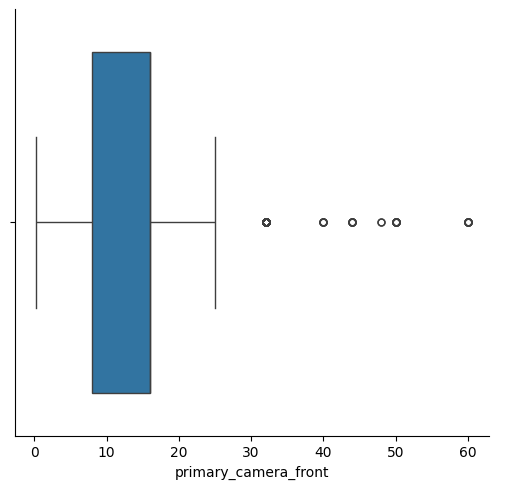

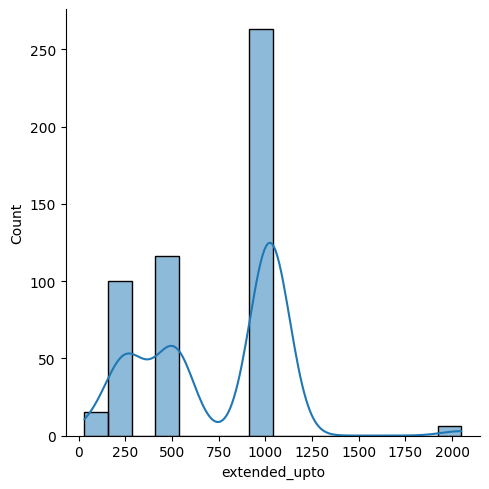

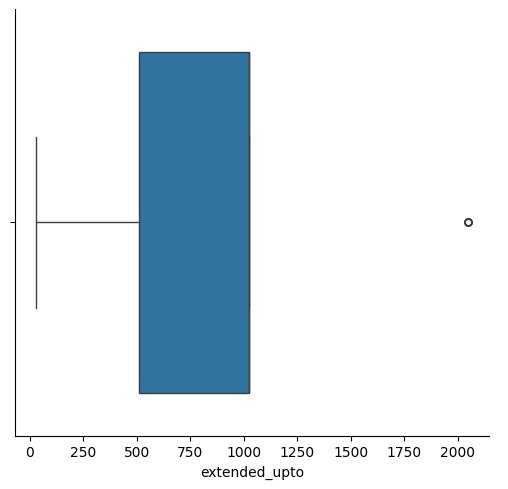

In [29]:
for col in num_columns:
  plot_graphs(col)

In [30]:
x = df.groupby('brand_name').count()['model'] 

In [32]:
temp_df = df[df['brand_name'].isin(x[x > 10].index)]

[]

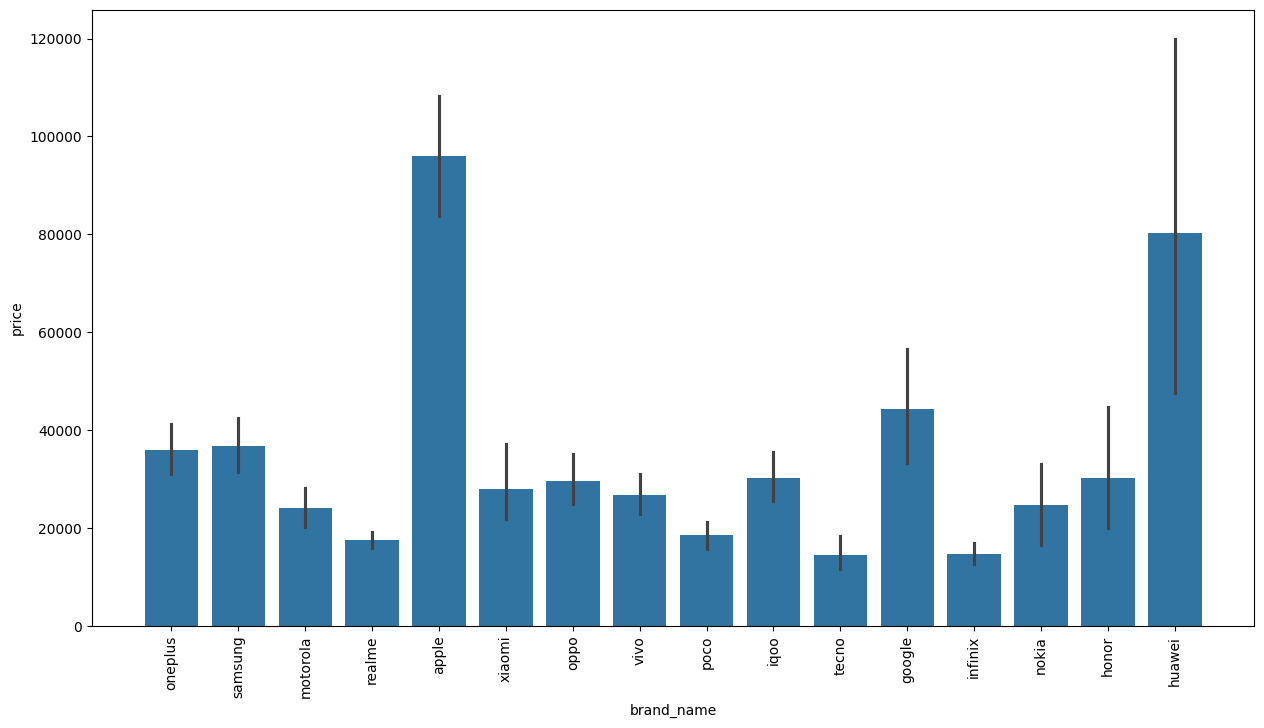

In [38]:
plt.figure(figsize=(15,8))
sns.barplot(data=temp_df,x='brand_name',y='price')
plt.xticks(rotation='vertical')
plt.plot()

### use np.median instaed of mean

[]

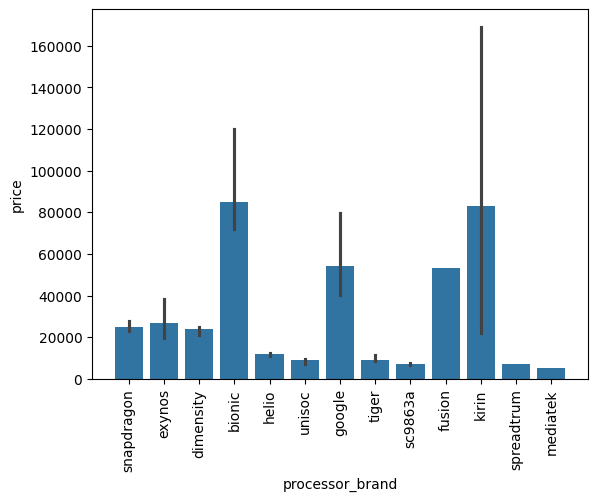

In [35]:
sns.barplot(data=temp_df,x='processor_brand',y='price',estimator=np.median)
plt.xticks(rotation='vertical')
plt.plot()

In [40]:
df.select_dtypes(include=['float64','int64']).corr()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
price,1.000000,0.283504,-0.048561,0.474049,-0.159232,0.116739,0.277591,0.386002,0.557168,0.113253,0.244115,0.125330,0.115228,0.092095,0.162995,-0.448628,0.091945
rating,0.283504,1.000000,0.199741,0.628446,-0.015581,0.542814,0.527613,0.757613,0.481070,0.298272,0.610795,0.515531,0.131480,0.562046,0.577861,-0.415265,0.346761
num_cores,-0.048561,0.199741,1.000000,0.192863,0.241289,0.360476,0.115413,0.303911,0.043934,0.385652,0.233010,0.343150,0.047578,0.312394,0.221483,0.072934,0.198742
processor_speed,0.474049,0.628446,0.192863,1.000000,-0.041930,0.345856,0.615657,0.627234,0.525510,0.290366,0.555004,0.255476,0.124191,0.281204,0.398207,-0.663085,0.259733
battery_capacity,-0.159232,-0.015581,0.241289,-0.041930,1.000000,0.128993,-0.078096,0.085690,-0.001444,0.348805,0.088636,0.155410,-0.072366,0.171465,-0.005111,0.174683,0.238755
fast_charging_available,0.116739,0.542814,0.360476,0.345856,0.128993,1.000000,NaN,0.439538,0.279877,0.346687,0.415278,0.470952,0.072208,0.427440,0.331769,-0.166626,0.333016
fast_charging,0.277591,0.527613,0.115413,0.615657,-0.078096,NaN,1.000000,0.533602,0.380985,0.258955,0.546374,0.126803,0.012674,0.390718,0.392673,-0.563131,0.026669
ram_capacity,0.386002,0.757613,0.303911,0.627234,0.085690,0.439538,0.533602,1.000000,0.592332,0.396613,0.573977,0.384908,0.167176,0.431377,0.519891,-0.482666,0.280564
internal_memory,0.557168,0.481070,0.043934,0.525510,-0.001444,0.279877,0.380985,0.592332,1.000000,0.276401,0.380263,0.236609,0.154839,0.200656,0.256869,-0.397903,0.232860
screen_size,0.113253,0.298272,0.385652,0.290366,0.348805,0.346687,0.258955,0.396613,0.276401,1.000000,0.333411,0.371769,0.076910,0.329288,0.214725,-0.094878,0.265277


In [41]:
df.select_dtypes(include=['float64','int64']).corr()['price']

price                        1.000000
rating                       0.283504
num_cores                   -0.048561
processor_speed              0.474049
battery_capacity            -0.159232
fast_charging_available      0.116739
fast_charging                0.277591
ram_capacity                 0.386002
internal_memory              0.557168
screen_size                  0.113253
refresh_rate                 0.244115
num_rear_cameras             0.125330
num_front_cameras            0.115228
primary_camera_rear          0.092095
primary_camera_front         0.162995
extended_memory_available   -0.448628
extended_upto                0.091945
Name: price, dtype: float64

In [46]:
df.select_dtypes(include=['float64','int64']).corr()['rating']

price                        0.283504
rating                       1.000000
num_cores                    0.199741
processor_speed              0.628446
battery_capacity            -0.015581
fast_charging_available      0.542814
fast_charging                0.527613
ram_capacity                 0.757613
internal_memory              0.481070
screen_size                  0.298272
refresh_rate                 0.610795
num_rear_cameras             0.515531
num_front_cameras            0.131480
primary_camera_rear          0.562046
primary_camera_front         0.577861
extended_memory_available   -0.415265
extended_upto                0.346761
Name: rating, dtype: float64

In [47]:
df['rating'].isnull().sum()

101

## knn imputer


In [43]:
df.shape

(980, 25)

In [44]:
x_df = df.select_dtypes(include=['int64','float64']).drop(columns='price')

In [45]:
from sklearn.impute import KNNImputer

In [48]:
imputer = KNNImputer(n_neighbors=5)

In [49]:
x_df_values = imputer.fit_transform(x_df)

In [50]:
x_df = pd.DataFrame(x_df_values,columns=x_df.columns)

In [51]:
x_df['price'] = df['price']

In [52]:
x_df.head()

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,price
0,89.0,8.0,3.2,5000.0,1.0,100.0,12.0,256.0,6.70,120.0,3.0,1.0,50.0,16.0,0.0,870.4,54999
1,81.0,8.0,2.2,5000.0,1.0,33.0,6.0,128.0,6.59,120.0,3.0,1.0,64.0,16.0,1.0,1024.0,19989
2,75.0,8.0,2.4,5000.0,1.0,15.0,4.0,64.0,6.60,90.0,3.0,1.0,50.0,13.0,1.0,1024.0,16499
3,81.0,8.0,2.2,5000.0,1.0,29.2,6.0,128.0,6.55,120.0,3.0,1.0,50.0,16.0,1.0,1024.0,14999
4,82.0,8.0,2.6,5000.0,1.0,67.0,6.0,128.0,6.70,120.0,3.0,1.0,108.0,16.0,0.0,1024.0,24999


In [53]:
a = x_df.corr()['price'].reset_index()

In [55]:
b = df.select_dtypes(include=['int64','float64']).drop(columns='price').reset_index()

In [56]:
b.merge(a,on='index')

ValueError: You are trying to merge on int64 and object columns for key 'index'. If you wish to proceed you should use pd.concat